## Exploring Racial Demographic Data in Carson using ACS Survey Data

Import the libraries

In [3]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Import the dataset. Here we will be using census block groups.

In [4]:
# city of Carson population block group data from american community survey census data
census_carson = gpd.read_file('data/carson_acs2019_5yr_B03002_15000US060375433222 (2).geojson')

I want to become more familiar with the data and identify the number of columns, size etc. Basically, I want to begin to identify what I will need to further define and clean up.

In [5]:
census_carson.shape

(60, 45)

In [6]:
census_carson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             60 non-null     object  
 1   name              60 non-null     object  
 2   B03002001         60 non-null     float64 
 3   B03002001, Error  60 non-null     float64 
 4   B03002002         60 non-null     float64 
 5   B03002002, Error  60 non-null     float64 
 6   B03002003         60 non-null     float64 
 7   B03002003, Error  60 non-null     float64 
 8   B03002004         60 non-null     float64 
 9   B03002004, Error  60 non-null     float64 
 10  B03002005         60 non-null     float64 
 11  B03002005, Error  60 non-null     float64 
 12  B03002006         60 non-null     float64 
 13  B03002006, Error  60 non-null     float64 
 14  B03002007         60 non-null     float64 
 15  B03002007, Error  60 non-null     float64 
 16  B03002008         60

In [7]:
census_carson.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",3318.0,280.0,2360.0,353.0,485.0,166.0,1828.0,358.0,...,12.0,470.0,184.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",757.0,411.0,610.0,396.0,0.0,12.0,610.0,396.0,...,12.0,84.0,101.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",839.0,304.0,799.0,293.0,0.0,12.0,765.0,298.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",1219.0,447.0,129.0,111.0,0.0,12.0,129.0,111.0,...,12.0,662.0,398.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",1183.0,385.0,1164.0,390.0,337.0,262.0,707.0,257.0,...,12.0,19.0,32.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


<AxesSubplot:>

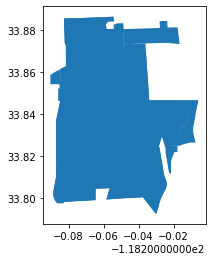

In [8]:
census_carson.plot()

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
census_carson.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
41,15000US060375438022,"Block Group 2, Los Angeles, CA",881.0,401.0,387.0,221.0,67.0,66.0,0.0,12.0,0.0,12.0,320.0,236.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,494.0,342.0,79.0,102.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,371.0,339.0,44.0,62.0,44.0,62.0,0.0,12.0,"MULTIPOLYGON (((-118.27791 33.83156, -118.2749..."


In [11]:
list(census_carson)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

The list is fairly long and I already know that I won't be needing all the rows, so now I am going to identify which rows I would like to keep and redefine my data to only include these rows.

In [12]:
columns_to_keep=['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [13]:
carsoncensus = census_carson[columns_to_keep]

In [14]:
carsoncensus.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",3318.0,2360.0,485.0,1828.0,0.0,34.0,0.0,1.0,12.0,958.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",757.0,610.0,0.0,610.0,0.0,0.0,0.0,0.0,0.0,147.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",839.0,799.0,0.0,765.0,0.0,0.0,0.0,0.0,34.0,40.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",1219.0,129.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0,1090.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",1183.0,1164.0,337.0,707.0,0.0,80.0,0.0,0.0,40.0,19.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


In [15]:
list(carsoncensus)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

While this list is better, it still doesn't give me a clear label as to what my data is showing. Now, to rename them.

In [16]:
carsoncensus.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [17]:
carsoncensus.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,15000US060375410021,"Block Group 1, Los Angeles, CA",3318.0,2360.0,485.0,1828.0,0.0,34.0,0.0,1.0,12.0,958.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826..."
1,15000US060375431005,"Block Group 5, Los Angeles, CA",757.0,610.0,0.0,610.0,0.0,0.0,0.0,0.0,0.0,147.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659..."
2,15000US060375431006,"Block Group 6, Los Angeles, CA",839.0,799.0,0.0,765.0,0.0,0.0,0.0,0.0,34.0,40.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637..."
3,15000US060375432024,"Block Group 4, Los Angeles, CA",1219.0,129.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0,1090.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482..."
4,15000US060375433041,"Block Group 1, Los Angeles, CA",1183.0,1164.0,337.0,707.0,0.0,80.0,0.0,0.0,40.0,19.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437..."


I want to double check and be sure that everything has populated correctly and there are no errors with my totals.

In [18]:
random_tract = carsoncensus.sample()

In [19]:
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
41,15000US060375438022,"Block Group 2, Los Angeles, CA",881.0,387.0,67.0,0.0,0.0,320.0,0.0,0.0,0.0,494.0,"MULTIPOLYGON (((-118.27791 33.83156, -118.2749..."


In [20]:
random_tract.iloc[0]['Total']

881.0

In [21]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 881.0


In [22]:
carsoncensus['Total'].head()

0    3318.0
1     757.0
2     839.0
3    1219.0
4    1183.0
Name: Total, dtype: float64

In [23]:
carsoncensus['Total'].mean()

3135.6666666666665

In [24]:
carsoncensus['Total'].median()

1528.5

In [25]:
carsoncensus['Total'].describe()

count       60.000000
mean      3135.666667
std      11711.855786
min          0.000000
25%       1030.750000
50%       1528.500000
75%       2116.000000
max      92079.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

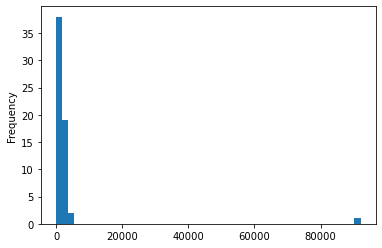

In [26]:
carsoncensus['Total'].plot.hist(bins=50)

In [27]:
carsoncensus_sorted = carsoncensus.sort_values(by='Total',ascending = False)

In [28]:
# display the data, but just a few columns to keep it clean
carsoncensus_sorted[['geoid','Total']].head(10)

,geoid,Total
59,16000US0611530,92079.0
11,15000US060375433064,3918.0
26,15000US060375436011,3781.0
36,15000US060375437031,3370.0
0,15000US060375410021,3318.0
12,15000US060375433211,3293.0
27,15000US060375436041,3165.0
37,15000US060375438011,2951.0
16,15000US060375433223,2790.0
32,15000US060375437022,2736.0


Above, I see that row 59 is showing me the entire population of Carson. While it's important to know, I don't want this to mess up my analysis. Before I drop it, I want to see if there are any other rows that may impact my total (ie. areas in Carson where there is no population/demographic information).

In [29]:
carsoncensus[carsoncensus['Total']==0]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
57,15000US060379800021,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
58,15000US060379800251,"Block Group 1, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25712 33.83927, -118.2571..."


Now I know that I should drop rows 57,58, and 59

In [30]:
carsoncensus = carsoncensus.drop([57,58])

In [31]:
carsoncensus.tail()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
53,15000US060375440021,"Block Group 1, Los Angeles, CA",608.0,320.0,142.0,31.0,0.0,83.0,7.0,0.0,57.0,288.0,"MULTIPOLYGON (((-118.22662 33.82955, -118.2263..."
54,15000US060375440022,"Block Group 2, Los Angeles, CA",1476.0,388.0,79.0,88.0,11.0,159.0,0.0,0.0,51.0,1088.0,"MULTIPOLYGON (((-118.22604 33.83122, -118.2258..."
55,15000US060375440023,"Block Group 3, Los Angeles, CA",1103.0,548.0,150.0,106.0,0.0,214.0,13.0,0.0,65.0,555.0,"MULTIPOLYGON (((-118.22588 33.82930, -118.2258..."
56,15000US060375723012,"Block Group 2, Los Angeles, CA",1755.0,645.0,230.0,142.0,0.0,205.0,22.0,0.0,46.0,1110.0,"MULTIPOLYGON (((-118.22509 33.82548, -118.2237..."
59,16000US0611530,"Carson, CA",92079.0,57703.0,6462.0,21624.0,226.0,24176.0,2388.0,95.0,2732.0,34376.0,"MULTIPOLYGON (((-118.28888 33.80246, -118.2888..."


Oops I forgot to include row 59!

In [32]:
carsoncensus = carsoncensus.drop([59])

In [33]:
carsoncensus.tail()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
52,15000US060375440014,"Block Group 4, Los Angeles, CA",1738.0,286.0,18.0,165.0,0.0,9.0,61.0,9.0,24.0,1452.0,"MULTIPOLYGON (((-118.22463 33.83474, -118.2243..."
53,15000US060375440021,"Block Group 1, Los Angeles, CA",608.0,320.0,142.0,31.0,0.0,83.0,7.0,0.0,57.0,288.0,"MULTIPOLYGON (((-118.22662 33.82955, -118.2263..."
54,15000US060375440022,"Block Group 2, Los Angeles, CA",1476.0,388.0,79.0,88.0,11.0,159.0,0.0,0.0,51.0,1088.0,"MULTIPOLYGON (((-118.22604 33.83122, -118.2258..."
55,15000US060375440023,"Block Group 3, Los Angeles, CA",1103.0,548.0,150.0,106.0,0.0,214.0,13.0,0.0,65.0,555.0,"MULTIPOLYGON (((-118.22588 33.82930, -118.2258..."
56,15000US060375723012,"Block Group 2, Los Angeles, CA",1755.0,645.0,230.0,142.0,0.0,205.0,22.0,0.0,46.0,1110.0,"MULTIPOLYGON (((-118.22509 33.82548, -118.2237..."


Much better!

Now that I have my data somewhat sorted, I want to find out the percentage breakdown of racial demographics in Carson.

In [34]:
carsoncensus.info

<bound method DataFrame.info of                   geoid                            name   Total  Non Hispanic  \
0   15000US060375410021  Block Group 1, Los Angeles, CA  3318.0        2360.0   
1   15000US060375431005  Block Group 5, Los Angeles, CA   757.0         610.0   
2   15000US060375431006  Block Group 6, Los Angeles, CA   839.0         799.0   
3   15000US060375432024  Block Group 4, Los Angeles, CA  1219.0         129.0   
4   15000US060375433041  Block Group 1, Los Angeles, CA  1183.0        1164.0   
5   15000US060375433042  Block Group 2, Los Angeles, CA  2069.0        1904.0   
6   15000US060375433043  Block Group 3, Los Angeles, CA  1446.0        1379.0   
7   15000US060375433044  Block Group 4, Los Angeles, CA  1174.0        1061.0   
8   15000US060375433061  Block Group 1, Los Angeles, CA  2525.0        1930.0   
9   15000US060375433062  Block Group 2, Los Angeles, CA   946.0         582.0   
10  15000US060375433063  Block Group 3, Los Angeles, CA   474.0         333.0

This is, frankly, messy to look at. To make it easier to understand and see one clear number/percentage, I will create new columns for percentages of Hispanic and Non-Hispanic populations in Carson.

In [35]:
# output columns
list(carsoncensus)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [36]:
carsoncensus['Percent Non Hispanic'] = carsoncensus['Non Hispanic']/carsoncensus['Total']*100
carsoncensus['Percent Hispanic'] = carsoncensus['Hispanic']/carsoncensus['Total']*100

Let's see if my two new columns were added.

In [37]:
carsoncensus.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic
29,15000US060375437011,"Block Group 1, Los Angeles, CA",1572.0,747.0,31.0,0.0,0.0,612.0,96.0,0.0,8.0,825.0,"MULTIPOLYGON (((-118.26804 33.82420, -118.2678...",47.519084,52.480916
13,15000US060375433212,"Block Group 2, Los Angeles, CA",2153.0,1951.0,162.0,1196.0,0.0,408.0,14.0,0.0,171.0,202.0,"MULTIPOLYGON (((-118.26627 33.86774, -118.2662...",90.617743,9.382257
20,15000US060375434002,"Block Group 2, Los Angeles, CA",1739.0,569.0,43.0,268.0,0.0,219.0,0.0,0.0,39.0,1170.0,"MULTIPOLYGON (((-118.27437 33.85959, -118.2741...",32.719954,67.280046
52,15000US060375440014,"Block Group 4, Los Angeles, CA",1738.0,286.0,18.0,165.0,0.0,9.0,61.0,9.0,24.0,1452.0,"MULTIPOLYGON (((-118.22463 33.83474, -118.2243...",16.455696,83.544304
55,15000US060375440023,"Block Group 3, Los Angeles, CA",1103.0,548.0,150.0,106.0,0.0,214.0,13.0,0.0,65.0,555.0,"MULTIPOLYGON (((-118.22588 33.82930, -118.2258...",49.682684,50.317316


They were!

For the sake of my project, I want to see the geographic distribution of Hispanic and Non-Hispanic populations in Carson.

<AxesSubplot:>

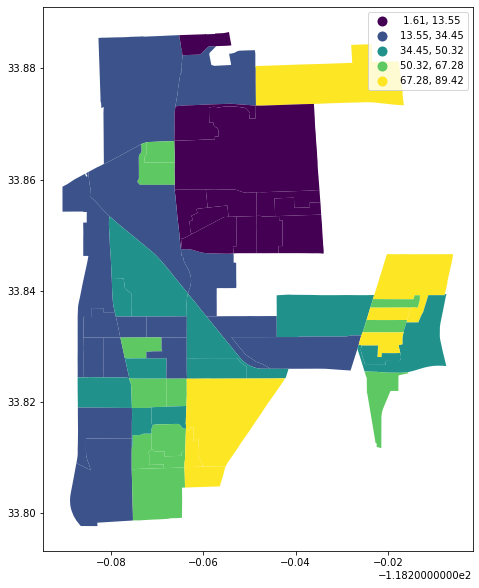

In [38]:
carsoncensus.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

While this is helpful, it may be more helpful to see a side by side comparison of Hispanic and Non-Hispanic populations.

Text(0.5, 1.0, 'Percent Non Hispanic')

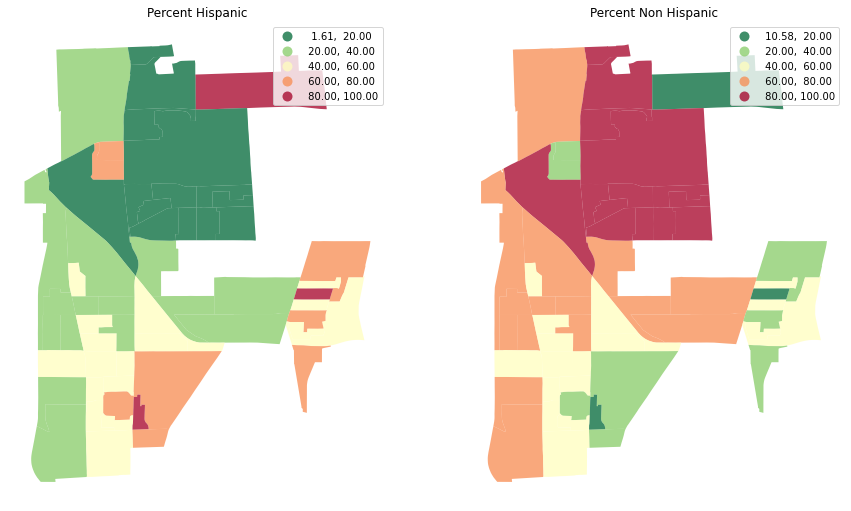

In [39]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
carsoncensus.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic")

# percent non-hispanic on the right
carsoncensus.plot(column='Percent Non Hispanic', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic")

The contrast between Hispanic and Non-Hispanic is pretty clear, and we see that the two maps are essentially the reverse of one another. However, it may be useful to get even more specific and have percentages for the subcategories of non-Hispanic populations.

In [40]:
carsoncensus['Percent Non Hispanic White'] = carsoncensus['Non Hispanic White']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic Black'] = carsoncensus['Non Hispanic Black']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic American Indian and Alaska Native'] = carsoncensus['Non Hispanic American Indian and Alaska Native']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic Asian'] = carsoncensus['Non Hispanic Asian']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = carsoncensus['Non Hispanic Native Hawaiian and Other Pacific Islander']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic Some other race'] = carsoncensus['Non Hispanic Some other race']/carsoncensus['Total']*100
carsoncensus['Percent Non Hispanic Two or more races'] = carsoncensus['Non Hispanic Two or more races']/carsoncensus['Total']*100

In [56]:
carsoncensus_total = carsoncensus['Total'].sum()
print('City of Carson, Racial Demographics:' + str(carsoncensus_total))

nonhispanicwhite_total = carsoncensus['Percent Non Hispanic White'].sum()
nonhispanicwhite = ((nonhispanicwhite_total/carsoncensus_total)*100)
print('Non Hispanic White' + str(carsoncensus_total))
print('Percent Non Hispanic White: ' + str(nonhispanicwhite))

nonhispanicblack_total = carsoncensus['Percent Non Hispanic Black'].sum()
nonhispanicblack = ((nonhispanicblack_total/carsoncensus_total)*100)
print('Non Hispanic Black: ' + str(nonhispanicblack_total))
print('Percent Non Hispanic Black: ' + str(nonhispanicblack))

nonhispanicasian_total = carsoncensus['Percent Non Hispanic Asian'].sum()
nonhispanicasian = ((nonhispanicasian_total/carsoncensus_total)*100)
print('Non Hispanic Asian: ' + str(nonhispanicasian_total))
print('Percent Non Hispanic Asian: ' + str(nonhispanicasian))

hispanic_total = carsoncensus['Percent Hispanic'].sum()
hispanic = ((hispanic_total/carsoncensus_total)*100)
print('Hispanic' + str(carsoncensus_total))
print('Percent Hispanic: ' + str(hispanic))

nonhispanicamericanindian_total = carsoncensus['Percent Non Hispanic American Indian and Alaska Native'].sum()
nonhispanicamericanindian = ((nonhispanicamericanindian_total/carsoncensus_total)*100)
print('Non Hispanic American Indian and Alaska Native' + str(carsoncensus_total))
print('Percent Non Hispanic American Indian and Alaska Native: ' + str(nonhispanicamericanindian))

nonhispanicnativehawaiian_total = carsoncensus['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'].sum()
nonhispanicnativehawaiian = ((nonhispanicnativehawaiian_total/carsoncensus_total)*100)
print('Non Hispanic Native Hawaiian and Other Pacific Islander' + str(carsoncensus_total))
print('Percent Non Hispanic Native Hawaiian and Other Pacific Islander: ' + str(nonhispanicnativehawaiian))

nonhispanicotherrace_total = carsoncensus['Percent Non Hispanic Some other race'].sum()
nonhispanicotherrace = ((nonhispanicotherrace_total/carsoncensus_total)*100)
print('Non Hispanic Some other race' + str(carsoncensus_total))
print('Percent Non Hispanic Some other race: ' + str(nonhispanicotherrace))

nonhispanictworaces_total = carsoncensus['Percent Non Hispanic Two or more races'].sum()
nonhispanictworaces = ((nonhispanictworaces_total/carsoncensus_total)*100)
print('Non Hispanic Two or more races' + str(carsoncensus_total))
print('Percent Non Hispanic Two or more races: ' + str(nonhispanictworaces))

City of Carson, Racial Demographics:96061.0
Non Hispanic White96061.0
Percent Non Hispanic White: 0.4243564193523967
Non Hispanic Black: 1418.8650203467205
Percent Non Hispanic Black: 1.4770458566397606
Non Hispanic Asian: 1330.2407091504622
Percent Non Hispanic Asian: 1.3847874883151978
Hispanic96061.0
Percent Hispanic: 2.320089912902322
Non Hispanic American Indian and Alaska Native96061.0
Percent Non Hispanic American Indian and Alaska Native: 0.011640644809483734
Non Hispanic Native Hawaiian and Other Pacific Islander96061.0
Percent Non Hispanic Native Hawaiian and Other Pacific Islander: 0.1497910950991654
Non Hispanic Some other race96061.0
Percent Non Hispanic Some other race: 0.017243901297701703
Non Hispanic Two or more races96061.0
Percent Non Hispanic Two or more races: 0.14877429089472316


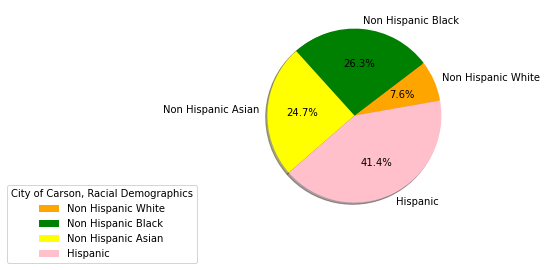

In [42]:
labels = ['Non Hispanic White','Non Hispanic Black','Non Hispanic Asian','Hispanic',]
sizes = [nonhispanicwhite_total,nonhispanicblack_total,nonhispanicasian_total, hispanic_total]
explode = (0,0,0.1) 

fig1, rent = plt.subplots()
rent.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10, colors = ['orange','green','yellow','pink'])
rent.legend(loc = 'lower right',bbox_to_anchor = (-0.2,-0.2),title = "City of Carson, Racial Demographics")

plt.show()

In [45]:
carsoncensus.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
0,15000US060375410021,"Block Group 1, Los Angeles, CA",3318.0,2360.0,485.0,1828.0,0.0,34.0,0.0,1.0,12.0,958.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826...",71.127185,28.872815,14.617239,55.093430,0.0,1.024714,0.0,0.030139,0.361664
1,15000US060375431005,"Block Group 5, Los Angeles, CA",757.0,610.0,0.0,610.0,0.0,0.0,0.0,0.0,0.0,147.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659...",80.581242,19.418758,0.000000,80.581242,0.0,0.000000,0.0,0.000000,0.000000
2,15000US060375431006,"Block Group 6, Los Angeles, CA",839.0,799.0,0.0,765.0,0.0,0.0,0.0,0.0,34.0,40.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637...",95.232420,4.767580,0.000000,91.179976,0.0,0.000000,0.0,0.000000,4.052443
3,15000US060375432024,"Block Group 4, Los Angeles, CA",1219.0,129.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0,1090.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482...",10.582445,89.417555,0.000000,10.582445,0.0,0.000000,0.0,0.000000,0.000000
4,15000US060375433041,"Block Group 1, Los Angeles, CA",1183.0,1164.0,337.0,707.0,0.0,80.0,0.0,0.0,40.0,19.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437...",98.393914,1.606086,28.486898,59.763314,0.0,6.762468,0.0,0.000000,3.381234


In [52]:
carsoncensus['Percent Non White'] = carsoncensus['Percent Non Hispanic Black'] + carsoncensus['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + carsoncensus['Percent Non Hispanic Asian'] + carsoncensus['Percent Non Hispanic Some other race'] + carsoncensus['Percent Non Hispanic Two or more races'] + carsoncensus['Percent Hispanic'] + carsoncensus['Percent Non Hispanic American Indian and Alaska Native']

In [53]:
carsoncensus['Percent White'] = carsoncensus['Percent Non Hispanic White']

In [54]:
carsoncensus.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Non white,Percent White,Percent Non White
0,15000US060375410021,"Block Group 1, Los Angeles, CA",3318.0,2360.0,485.0,1828.0,0.0,34.0,0.0,1.0,12.0,958.0,"MULTIPOLYGON (((-118.28273 33.88547, -118.2826...",71.127185,28.872815,14.617239,55.093430,0.0,1.024714,0.0,0.030139,0.361664,85.382761,14.617239,85.382761
1,15000US060375431005,"Block Group 5, Los Angeles, CA",757.0,610.0,0.0,610.0,0.0,0.0,0.0,0.0,0.0,147.0,"MULTIPOLYGON (((-118.26600 33.87342, -118.2659...",80.581242,19.418758,0.000000,80.581242,0.0,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,100.000000
2,15000US060375431006,"Block Group 6, Los Angeles, CA",839.0,799.0,0.0,765.0,0.0,0.0,0.0,0.0,34.0,40.0,"MULTIPOLYGON (((-118.26523 33.88598, -118.2637...",95.232420,4.767580,0.000000,91.179976,0.0,0.000000,0.0,0.000000,4.052443,100.000000,0.000000,100.000000
3,15000US060375432024,"Block Group 4, Los Angeles, CA",1219.0,129.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0,1090.0,"MULTIPOLYGON (((-118.24866 33.88042, -118.2482...",10.582445,89.417555,0.000000,10.582445,0.0,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,100.000000
4,15000US060375433041,"Block Group 1, Los Angeles, CA",1183.0,1164.0,337.0,707.0,0.0,80.0,0.0,0.0,40.0,19.0,"MULTIPOLYGON (((-118.24459 33.85660, -118.2437...",98.393914,1.606086,28.486898,59.763314,0.0,6.762468,0.0,0.000000,3.381234,71.513102,28.486898,71.513102


Text(0.5, 1.0, 'Percent White')

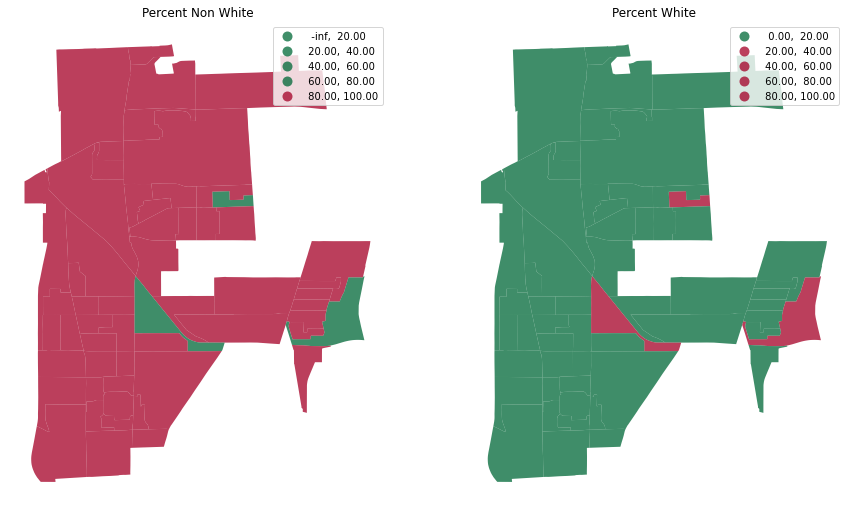

In [55]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
carsoncensus.plot(column='Percent Non White', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non White")

# percent non-hispanic on the right
carsoncensus.plot(column='Percent White', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent White")

In [ ]:
labels = ['Non Hispanic American Indian and Alaska Native','Non Hispanic Black','Non Hispanic Asian','Hispanic','Native Hawaiian and Other Pacific Islander','Non Hispanic Some other race','Percent Non Hispanic Two or more races']
sizes = [nonhispanicwhite_total,nonhispanicblack_total,nonhispanicasian_total, hispanic_total, nonhispanic]
explode = (0,0,0.1) 

fig1, rent = plt.subplots()
rent.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10, colors = ['orange','green','yellow','pink'])
rent.legend(loc = 'lower right',bbox_to_anchor = (-0.2,-0.2),title = "City of Carson, Racial Demographics")

plt.show()

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(20, 20))

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Hispanic'] > 90].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Block Groups in El Monte with more than 90% Percent Hispanic',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

I want to use this new data/cleaned up data for further analysis, so to save it, I will export it as a geojson file 

In [43]:
carsoncensus.to_file("carsoncensus.geojson", driver = 'GeoJSON')